In [1]:
!pip install opencv-python numpy tensorflow

  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.0
    Uninstalling numpy-2.4.0:
      Successfully uninstalled numpy-2.4.0


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.6 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.8.0 which is incompatible.
streamlit 1.45.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.45.1 requires pillow<12,>=7.1.0, but you have pillow 12.0.0 which is incompatible.


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

%matplotlib inline


ModuleNotFoundError: No module named 'google.colab'

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

gpus = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPU:", len(gpus))

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)

Number of GPU: 0


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data:", x_train.shape, y_train.shape)
print("Testing data :", x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Testing data : (10000, 28, 28) (10000,)


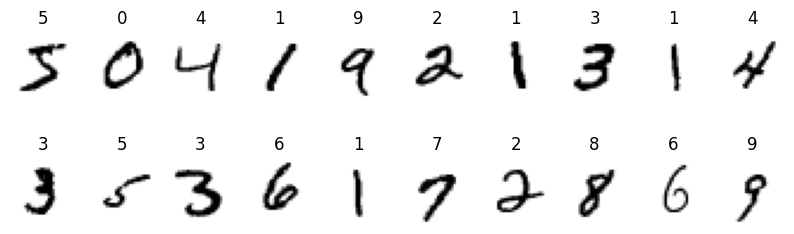

In [5]:
plt.figure(figsize=(10,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),

    layers.Dense(
        256,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.Dropout(0.4),

    layers.Dense(
        128,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train_cat,
    epochs=30,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stop]
)

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7419 - loss: 1.2296 - val_accuracy: 0.9400 - val_loss: 0.4723
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9274 - loss: 0.5011 - val_accuracy: 0.9561 - val_loss: 0.3529
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9470 - loss: 0.3775 - val_accuracy: 0.9596 - val_loss: 0.3050
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9521 - loss: 0.3282 - val_accuracy: 0.9623 - val_loss: 0.2705
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9538 - loss: 0.3032 - val_accuracy: 0.9658 - val_loss: 0.2492
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9580 - loss: 0.2796 - val_accuracy: 0.9681 - val_loss: 0.2369
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9584 - loss: 0.2713 - val_accuracy: 0.9643 - val_loss: 0.2426
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9606 - loss: 0.2602 - val_accuracy:

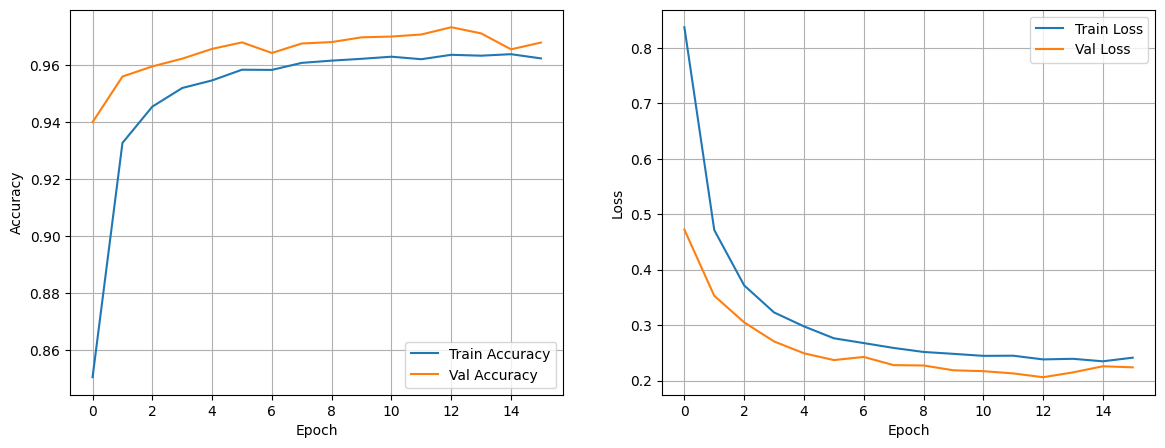

In [10]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.2109
Test Accuracy: 97.59%


In [12]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const button = document.createElement('button');
      button.textContent = 'Capture';
      div.appendChild(button);

      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => button.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

In [13]:
def preprocess_and_predict(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not found")
        return

    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = cv2.GaussianBlur(img, (5,5), 0)
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

    plt.imshow(img, cmap='gray')
    plt.title("Processed 28×28")
    plt.axis('off')
    plt.show()

    img = img.astype("float32") / 255.0
    img = img.reshape(1, 28, 28)

    pred = model.predict(img, verbose=0)
    digit = np.argmax(pred)
    confidence = np.max(pred)

    print(f"✅ Predicted Digit: {digit}")
    print(f"📊 Confidence: {confidence*100:.2f}%")

<IPython.core.display.Javascript object>

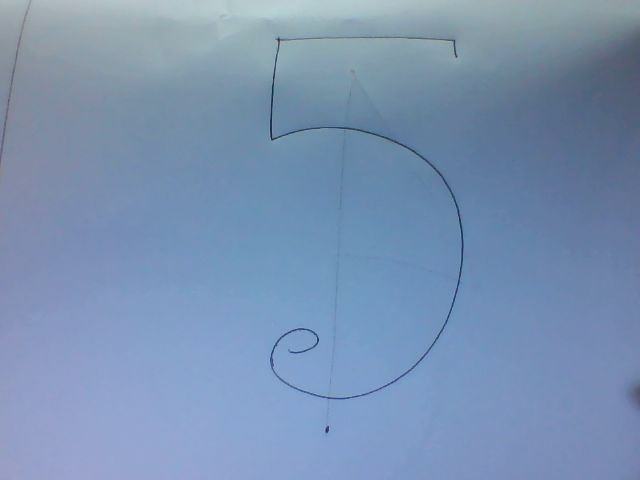

Predicting...


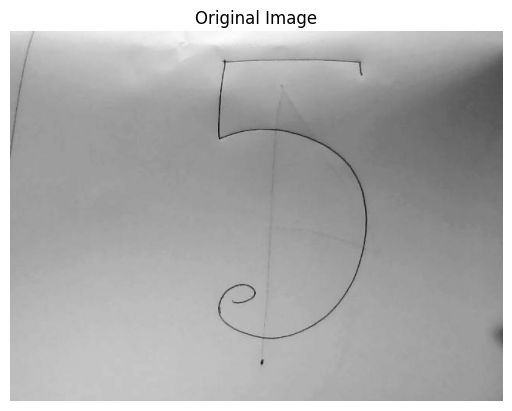

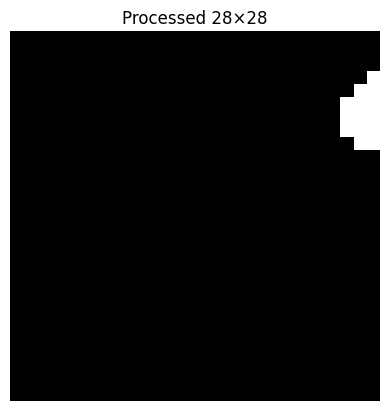

✅ Predicted Digit: 5
📊 Confidence: 70.08%


In [20]:
filename = take_photo()
display(Image(filename))

print("Predicting...")
preprocess_and_predict(filename)